In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import requests
import json
from datetime import datetime
%matplotlib inline
from MCForecastTools import MCSimulation
from pycoingecko import CoinGeckoAPI

In [3]:
file_path = Path("folder/subfolder/Percentage_change.csv")
df_percentchange = pd.read_csv(file_path, index_col="DATE")
df_percentchange.head(100)

,BTC,ETH,BNB,ADA,SOL
DATE,,,,,
2019-05-15,NaN,NaN,NaN,NaN,NaN
2019-05-16,-0.038611,0.064946,-0.018106,-0.070965,NaN
2019-05-17,-0.067617,-0.080519,-0.029020,-0.056937,NaN
2019-05-18,-0.005817,-0.033844,0.126317,-0.046622,NaN
2019-05-19,0.118904,0.107381,0.008923,0.093379,NaN
...,...,...,...,...,...
2019-08-18,0.008378,0.046282,0.015734,0.069535,NaN
2019-08-19,0.056848,0.044261,0.035369,-0.009274,NaN
2019-08-20,-0.013967,-0.032947,-0.029075,-0.020133,NaN


In [4]:
file_path2 = Path("folder/subfolder/df_Merged.csv")
df_merged = pd.read_csv(file_path2, index_col="DATE")
df_merged.head(100)

,BTC,ETH,BNB,ADA,SOL
DATE,,,,,
2019-05-15,8192.223139,248.745004,26.965077,0.094907,NaN
2019-05-16,7875.913200,264.900121,26.476836,0.088172,NaN
2019-05-17,7343.371457,243.570499,25.708478,0.083152,NaN
2019-05-18,7300.655158,235.327201,28.955892,0.079275,NaN
2019-05-19,8168.730690,260.596984,29.214251,0.086678,NaN
...,...,...,...,...,...
2019-08-18,10309.872436,194.357368,27.882349,0.050664,NaN
2019-08-19,10895.971844,202.959751,28.868525,0.050195,NaN
2019-08-20,10743.789313,196.272747,28.029166,0.049184,NaN


In [7]:
# Configuring a Monte Carlo simulation to forecast 
MC_1_year = MCSimulation(
            portfolio_data = df_merged,
            weights = [.2,.2,.2,.2,.2],
            num_simulation = 500,
            num_trading_days = 252
)

IndexError: Too many levels: Index has only 1 level, not 2

In [6]:
MC_1_year.portfolio_data.head()

NameError: name 'MC_1_year' is not defined

In [167]:
MC_1_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/juanraigosa/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986097,0.991784,1.010097,0.978008,0.986846,1.008372,1.015585,0.983832,1.007407,0.994998,...,1.005800,1.002792,0.961225,0.976489,1.021428,1.015753,1.006519,1.022847,1.017517,1.033226
2,1.004183,0.973816,1.018902,0.957508,1.001504,1.015777,1.018626,0.974113,1.011145,0.996826,...,1.015876,1.003806,0.984758,0.982849,1.031158,1.014785,1.012798,1.018217,1.005828,1.008201
3,0.989491,0.969838,1.033150,0.941915,1.009238,1.039482,0.988207,0.966836,1.027849,1.007267,...,1.008556,1.028336,0.993163,0.961961,1.029085,1.013862,1.026689,1.017136,0.995588,1.018776
4,0.966530,0.957668,1.009591,0.947583,1.039148,1.046711,0.985632,0.980977,1.004877,1.027382,...,1.007042,1.033271,1.008932,0.969290,1.002223,1.002921,1.012714,1.005064,0.987790,1.011567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.567680,1.958016,1.986473,1.428645,0.648439,1.492008,1.503454,1.535076,1.548589,1.742618,...,1.567925,1.234567,3.531481,1.789209,1.177000,1.430984,1.028520,2.023296,1.264263,1.373834
249,1.591193,1.974466,2.003213,1.420625,0.645115,1.520997,1.523968,1.559794,1.560979,1.774585,...,1.615786,1.226317,3.541952,1.841679,1.179217,1.510143,1.000350,2.082323,1.278123,1.349512
250,1.588129,1.914786,1.984216,1.434905,0.650484,1.526328,1.554500,1.555840,1.496824,1.752119,...,1.601071,1.248281,3.642326,1.846939,1.200557,1.509699,0.981058,2.122107,1.264965,1.401067
251,1.607196,1.948864,1.986460,1.450393,0.633698,1.492157,1.482870,1.540886,1.510731,1.762579,...,1.558844,1.245070,3.608068,1.814860,1.230616,1.549976,0.987982,2.131809,1.212188,1.385704


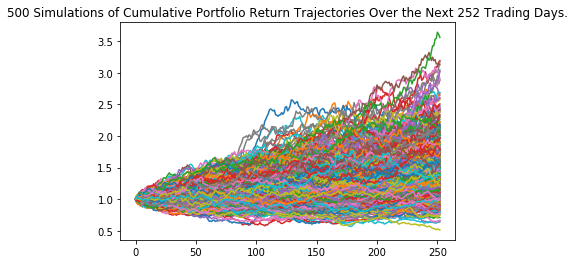

In [168]:
# Plot simulation outcomes
line_plot = MC_1_year.plot_simulation()

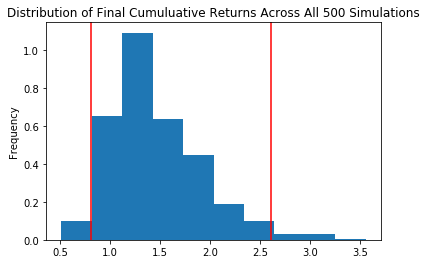

In [169]:
# Plot probability distribution and confidence intervals
dist_plot = MC_1_year.plot_distribution()

In [170]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_1_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.464270
std               0.464120
min               0.512807
25%               1.145650
50%               1.375015
75%               1.715708
max               3.560406
95% CI Lower      0.806611
95% CI Upper      2.606833
Name: 252, dtype: float64


In [171]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next year will end within in the range of $8066.11 and $26068.33


In [222]:
coins = pd.DataFrame(columns=["BTC", "ETH", "BNB","ADA","SOL"])
portfolio = str(input("Enter Portfolio name:"))

my_btc = int(input("Enter amount of btc: "))
my_eth = int(input("Enter amount of eth:"))
my_bnb = int(input("Enter amount of bnb: "))
my_ada = int(input("Enter amount of ada: "))
my_sol = int(input("Enter amount of sol:"))
coins_df = pd.DataFrame(data=[[my_btc,my_eth,my_bnb,my_ada,my_sol]],columns=["BTC", "ETH", "BNB","ADA","SOL"])

print(portfolio)
coins_df

Enter Portfolio name: abc
Enter amount of btc:  2
Enter amount of eth: 3
Enter amount of bnb:  4
Enter amount of ada:  5
Enter amount of sol: 6


abc


,BTC,ETH,BNB,ADA,SOL
0,2,3,4,5,6


In [ ]:
# Fetch current BTC price

In [225]:
btc_current_price = cg.get_price(ids='bitcoin', vs_currencies='usd')
btc_price = btc_current_price['bitcoin']['usd']
btc_price

41687

In [226]:
# Fetch current ETH price
eth_current_price = cg.get_price(ids='ethereum', vs_currencies='usd')
eth_price = eth_current_price['ethereum']['usd']
eth_price

3023.16

In [228]:
# Fetch current BNB price
bnb_current_price = cg.get_price(ids='binancecoin', vs_currencies='usd')
bnb_price = bnb_current_price['binancecoin']['usd']
bnb_price

416.76

In [229]:
# Fetch current ADA price
ada_current_price = cg.get_price(ids='cardano', vs_currencies='usd')
ada_price = ada_current_price['cardano']['usd']
ada_price

1.13

In [230]:
# Fetch current SOL price
sol_current_price = cg.get_price(ids='solana', vs_currencies='usd')
sol_price = sol_current_price['solana']['usd']
sol_price

114.02

In [231]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
my_bnb_value = my_bnb * bnb_price
my_ada_value = my_ada * ada_price
my_sol_value = my_sol * sol_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your {my_bnb} BNB is ${my_bnb_value:0.2f}")
print(f"The current value of your {my_ada} ADA is ${my_ada_value:0.2f}")
print(f"The current value of your {my_sol} SOL is ${my_sol_value:0.2f}")

The current value of your 2 BTC is $83374.00
The current value of your 3 ETH is $9069.48
The current value of your 4 BNB is $1667.04
The current value of your 5 ADA is $5.65
The current value of your 6 SOL is $684.12


In [233]:
# Consolidate crypto porfolio
crypto = my_btc_value + my_eth_value + my_bnb_value + my_ada_value + my_sol_value
print(f"The total value of your crypto portfolio is ${crypto:0.2f}")

The total value of your crypto portfolio is $94800.29
